In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


In [12]:
# Load the dataset
train_df = pd.read_csv('/content/Titanic_train.csv')
test_df = pd.read_csv('/content/Titanic_test.csv')


In [13]:
# Display the first few rows of the dataset
print(train_df.head())

# Summary statistics of the dataset
print(train_df.describe())

# Check for missing values
print(train_df.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop columns that are not useful for prediction
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Fill missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Convert categorical variables to numerical (encoding)
train_df['Sex'] = LabelEncoder().fit_transform(train_df['Sex'])
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)

# Define the features and target variable
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


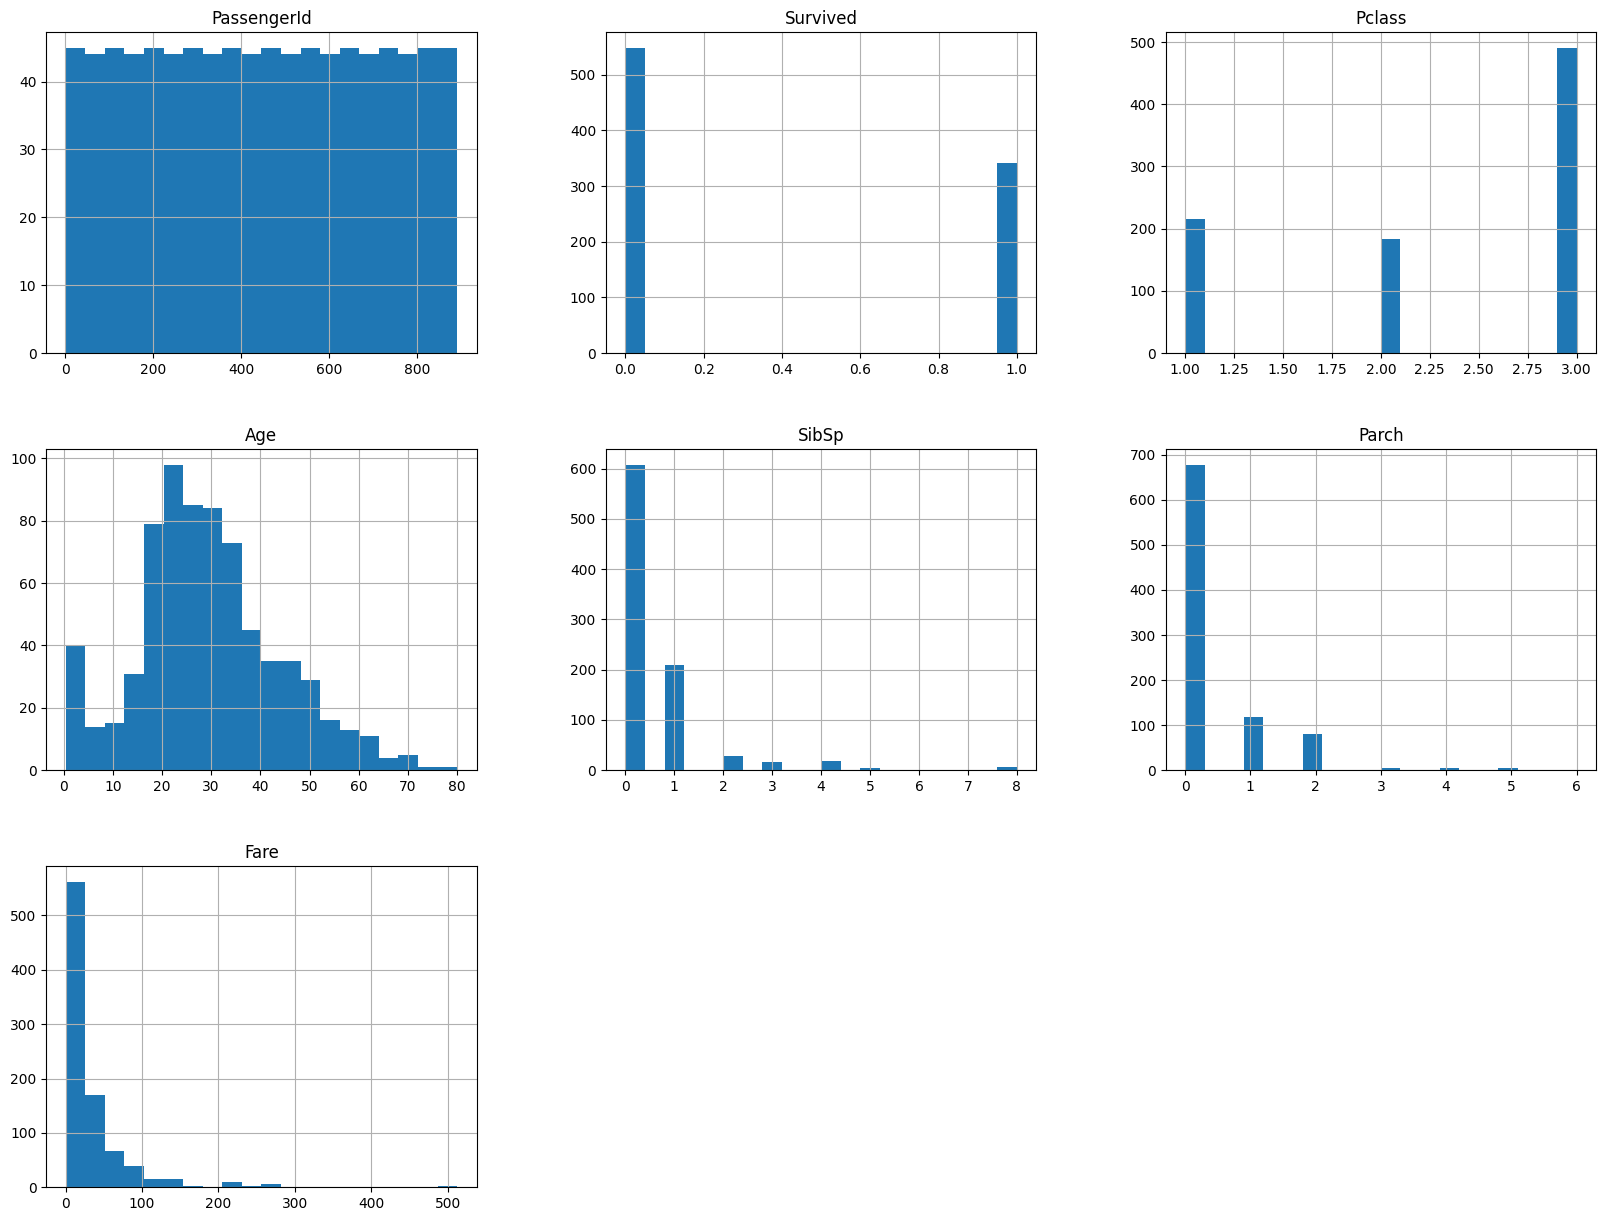

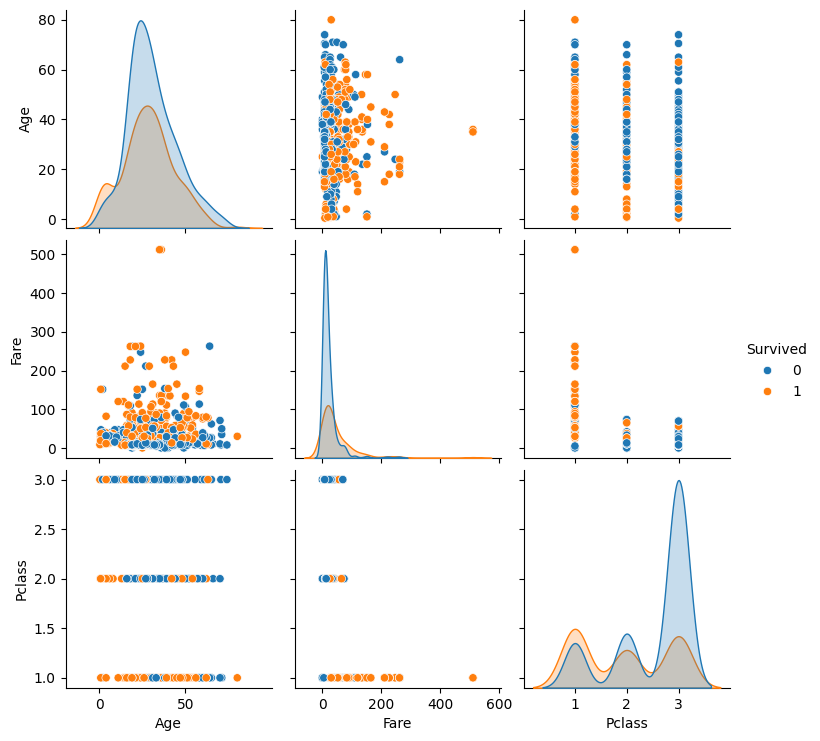

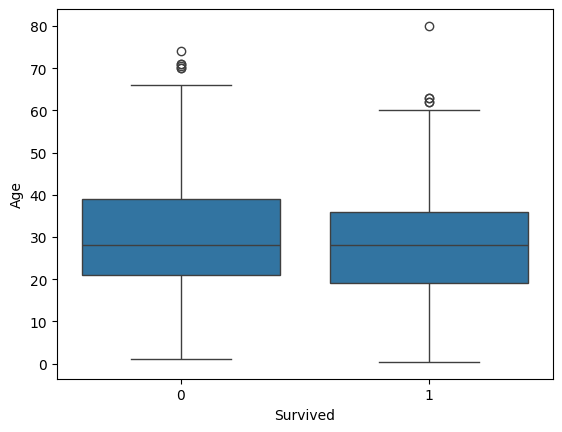

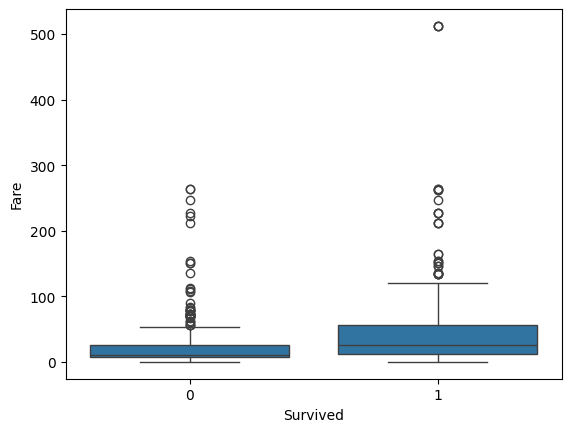

In [14]:
# Histograms of numerical features
train_df.hist(bins=20, figsize=(20, 15))
plt.show()

# Pair plots of some features
sns.pairplot(train_df[['Age', 'Fare', 'Survived', 'Pclass', 'Sex']], hue='Survived')
plt.show()

# Box plots of features against the target variable (Survived)
sns.boxplot(x='Survived', y='Age', data=train_df)
plt.show()

sns.boxplot(x='Survived', y='Fare', data=train_df)
plt.show()


In [15]:
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)


In [16]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)


In [17]:
train_df['Sex'] = LabelEncoder().fit_transform(train_df['Sex'])
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)


In [18]:
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [21]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

In [22]:
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]


In [23]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_prob):.4f}")


Accuracy: 0.8101
Precision: 0.7857
Recall: 0.7432
F1 Score: 0.7639
ROC-AUC: 0.8820


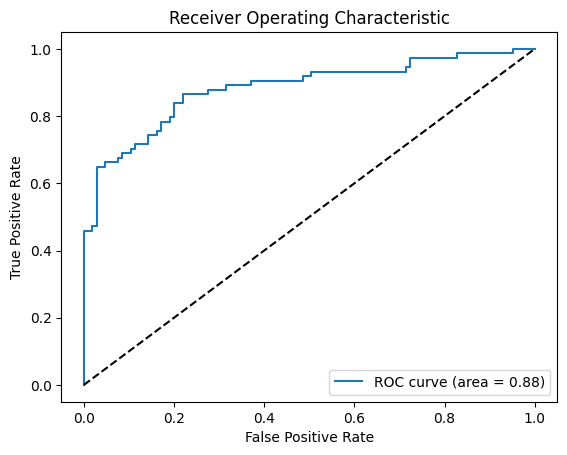

In [24]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_score(y_test, y_pred_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [25]:
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": logreg.coef_[0]})
print(coefficients)

# Sort coefficients to understand impact
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)


      Feature  Coefficient
0      Pclass    -0.785320
1         Sex    -1.277180
2         Age    -0.396010
3       SibSp    -0.349278
4       Parch    -0.096673
5        Fare     0.126579
6  Embarked_Q    -0.046344
7  Embarked_S    -0.189756
      Feature  Coefficient
5        Fare     0.126579
6  Embarked_Q    -0.046344
4       Parch    -0.096673
7  Embarked_S    -0.189756
3       SibSp    -0.349278
2         Age    -0.396010
0      Pclass    -0.785320
1         Sex    -1.277180
